# 210409 Fix Component 18

In [1]:
const COMPONENT = 18;

In [2]:
include("fix-component-base.jl");

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-17332659852608391676\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-1306912721017856705\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-17332659852608391676\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

,id,ncbi_id,name,rank,parent_id,in_v12,manual_threshold,report,ngenomes,comp_idx,diameter,outgoing,incoming,name_abbr
,Int64,Int64?,String,String?,Int64?,Bool,Float64,Bool,Int64,Int64,Float32,Int64,Int64,SubStri…
1,575,384,Rhizobium leguminosarum,species,90,1,NaN,1,27,1,0.883943,1,0,leguminosarum
2,1537,29449,Rhizobium etli,species,90,1,NaN,1,6,2,0.866327,0,1,etli


In [3]:
trees = Dict{String, Any}();

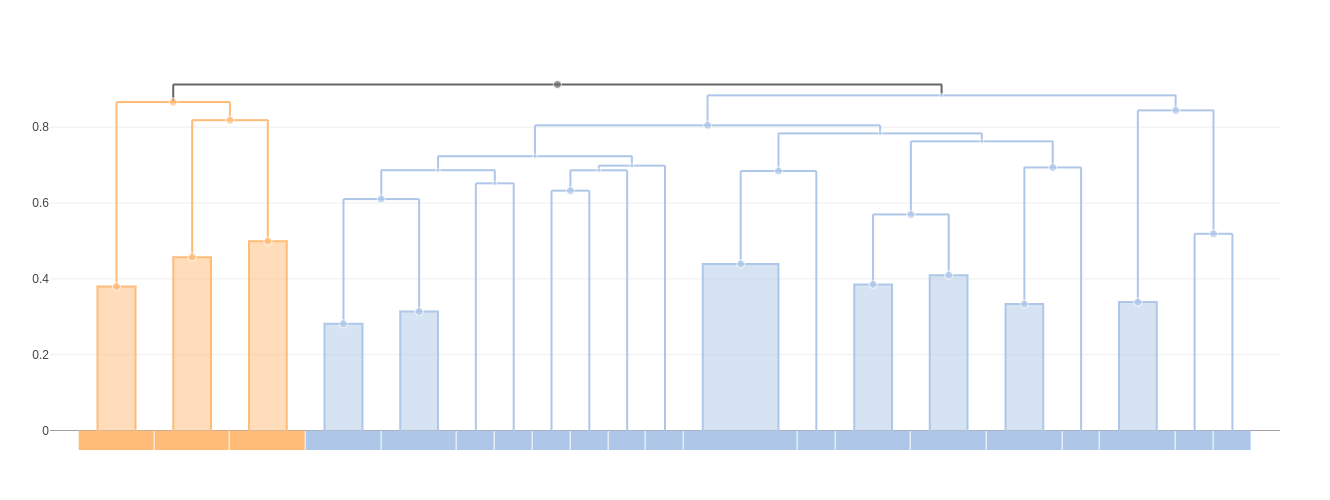

In [4]:
trees["all"] = cluster_annotate(cdata, 1:cdata.ntaxa)
plot(dendrogram(cdata, trees["all"]))

## Edits

### leguminosarum

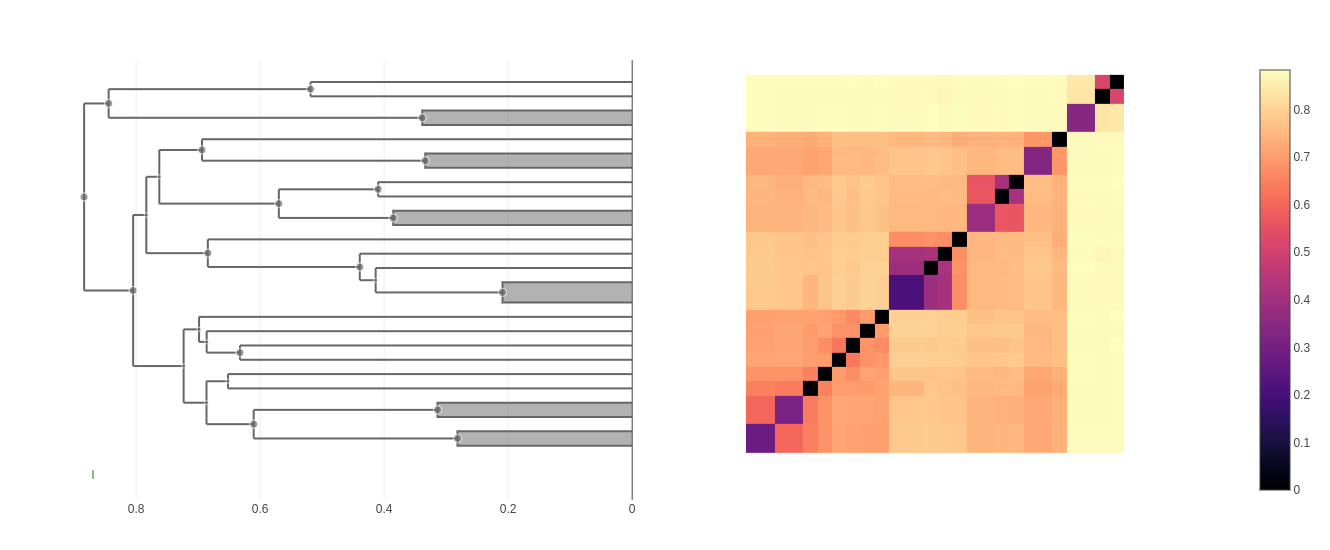

In [5]:
let taxon = "leguminosarum"
    trees[taxon] = cluster_annotate(cdata, taxon)
    plot(clustermap(cdata, trees[taxon]))
end

In [8]:
remove_subtrees!(edits, trees["leguminosarum"], 52)

#1 leguminosarum:
	4/27 removed
	Diameter 0.8839 => 0.8049


## Finish

In [9]:
complete_edits(edits)

,index,name,ngenomes,initial_diameter,taxon_removed,removed_genomes,split,manual_threshold,final_diameter
,Int64,SubStri…,Int64,Float32,Bool,Int64,String,Missing,String
1,1,leguminosarum,27,0.883943,0,4,,missing,0.8049
